In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go

from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("/content/drive/My Drive/ColabDataset/SentimentAndStockStudy/PreProcessDataset/ButterFly_Mixer.csv")

In [3]:
bseData = pd.read_csv("/content/drive/My Drive/ColabDataset/SentimentAndStockStudy/PreProcessDataset/BSE Data - Sheet1.csv")
nseData = pd.read_csv("/content/drive/My Drive/ColabDataset/SentimentAndStockStudy/PreProcessDataset/NSE Data - Sheet1.csv")


bseData.dropna(inplace=True)
nseData.dropna(inplace=True)

bseData['ClosePrice'] = MinMaxScaler().fit_transform(bseData['Close'].values.reshape(-1,1))
nseData['ClosePrice'] = MinMaxScaler().fit_transform(nseData['Close'].values.reshape(-1,1))
minMax = MinMaxScaler()

In [4]:
bseData['Date'] = pd.to_datetime(bseData['Date'])
nseData['Date'] = pd.to_datetime(bseData['Date'])

bseData.sort_values('Date',inplace=True)
nseData.sort_values('Date',inplace=True)

bseData.rename(columns={"- SPREAD -":"SpreadHighLow","Unnamed: 7":'SpreadOpenClose','Date':'DateOfReview'},inplace=True)
nseData.rename(columns={"- SPREAD -":"SpreadHighLow","Unnamed: 7":'SpreadOpenClose','Date':'DateOfReview'},inplace=True)

In [5]:
data.shape

(6479, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6479 entries, 0 to 6478
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   User Rating                  6479 non-null   float64
 1   User Review                  6479 non-null   object 
 2   User Name                    6479 non-null   object 
 3   Review Date                  6479 non-null   object 
 4   DateOfReview                 6479 non-null   object 
 5   FinalText                    6477 non-null   object 
 6   FinalTextSentimentNegative   6479 non-null   float64
 7   FinalTextSentimentPositive   6479 non-null   float64
 8   FinalTextSentimentNeutral    6479 non-null   float64
 9   FinalTextSentimentCompound   6479 non-null   float64
 10  FinalTextSentiment           6479 non-null   object 
 11  UserReviewSentimentNegative  6479 non-null   float64
 12  UserReviewSentimentPositive  6479 non-null   float64
 13  UserReviewSentimen

In [7]:
fig = px.scatter(data,x='DateOfReview',y = 'FinalTextSentimentCompound',title='Polarity Vs Date Of Review')

fig.show()

In [8]:
EachDayReview = pd.DataFrame(columns= ['FinalTextSentimentNegative','FinalTextSentimentPositive',
            'FinalTextSentimentNeutral','FinalTextSentimentCompound',
            'UserReviewSentimentNegative','UserReviewSentimentNegative',
            'UserReviewSentimentPositive','UserReviewSentimentNeutral',
            'UserReviewSentimentCompound'])

EachDayReview[['FinalTextSentimentNegative','FinalTextSentimentPositive',
            'FinalTextSentimentNeutral','FinalTextSentimentCompound',
            'UserReviewSentimentNegative','UserReviewSentimentNegative',
            'UserReviewSentimentPositive','UserReviewSentimentNeutral',
            'UserReviewSentimentCompound']] = data[['FinalTextSentimentNegative','FinalTextSentimentPositive',
            'FinalTextSentimentNeutral','FinalTextSentimentCompound',
            'UserReviewSentimentNegative','UserReviewSentimentNegative',
            'UserReviewSentimentPositive','UserReviewSentimentNeutral',
            'UserReviewSentimentCompound']].astype(float) 

In [9]:
EachDayReview.index = pd.to_datetime(data['DateOfReview'])

In [10]:
EachDayReview = EachDayReview.resample('D').mean().ffill()

In [11]:
EachDayReview['FinalTextLabel'] = ['pos' if x>0.5 else 'neu' if ((x<0.4) & (x>0.1)) else 'neg' for x in EachDayReview['FinalTextSentimentCompound']]
EachDayReview['UserReviewLabel'] = ['pos' if x>0.5 else 'neu' if ((x<0.4) & (x>0.1)) else 'neg' for x in EachDayReview['UserReviewSentimentCompound']]

In [12]:
EachDayReview['DateOfReview'] = EachDayReview.index
EachDayReview.reset_index(inplace= True,drop=True)

In [13]:
bseDataAndAllReview = pd.merge(bseData,EachDayReview,on='DateOfReview')
nseDataAndAllReview = pd.merge(nseData,EachDayReview,on='DateOfReview')

In [14]:
fig = px.scatter(EachDayReview,x=EachDayReview.index,y = 'FinalTextSentimentCompound',title='Polarity Vs Date Of Review')

fig.show()

In [15]:
class TextEDA:

  def __init__(self,textDf):
    self.textDf = textDf

    TextEDA.AverageSentimentOfAllProducts(self)
  
  def AverageSentimentOfAllProducts(self):

    #----------------------------------- Average Sentiment of All Products --------------------------------------------
    plt.figure(figsize=(19,9))
    sns.lineplot(x=self.textDf.index,y=self.textDf['FinalTextSentimentNegative'],label='Negative')
    sns.lineplot(x=self.textDf.index,y=self.textDf['FinalTextSentimentPositive'],label='Positive')
    sns.lineplot(x=self.textDf.index,y=self.textDf['FinalTextSentimentNeutral'],label='Neutral')

    plt.title('Average Sentiment of All Products')
    plt.ylabel('Polarity Score')
    plt.xlabel('Date Of Review')
    plt.legend()
    plt.show()

    TextEDA.PolarityScoreVsDateOfReview(self)
  
  def PolarityScoreVsDateOfReview(self):
    #----------------------------------------  Polarity Score Vs Date of Review ---------------------------------------------
    vals = pd.melt(self.textDf,id_vars=['DateOfReview'],value_vars=['FinalTextSentimentNegative','FinalTextSentimentPositive',
            'FinalTextSentimentNeutral','FinalTextSentimentCompound',
            'UserReviewSentimentNegative','UserReviewSentimentNegative',
            'UserReviewSentimentPositive','UserReviewSentimentNeutral',
            'UserReviewSentimentCompound'])
    fig = px.line(vals,x='DateOfReview',y='value',color='variable')

    fig.update_layout(title = 'Polarity Score Vs Date of Review',
                      xaxis={'title':'Date Of Review'},
                      yaxis={'title':'Polarity Score'})
    fig.show()
    TextEDA.PolarityScoreOfCleanTextData(self)

  
  def PolarityScoreOfCleanTextData(self):
    #----------------------------------------  Polarity Score of Clean Text Data ---------------------------------------------
    val = pd.melt(self.textDf,id_vars=['DateOfReview'],value_vars=['FinalTextSentimentNegative','FinalTextSentimentPositive',
            'FinalTextSentimentNeutral','FinalTextSentimentCompound'])

    fig = px.line(val , x='DateOfReview', y='value',color='variable')

    fig.update_layout(title = 'Polarity Score of Clean Text Data',
                      xaxis={'title':'Date Of Review'},
                      yaxis={'title':'Polarity Score'})
    fig.show()
    TextEDA.PolarityScoreOfRawTextData(self)
  
  def PolarityScoreOfRawTextData(self):
    #----------------------------------------  Polarity Score of Raw Text Data ---------------------------------------------
    val = pd.melt(self.textDf,id_vars=['DateOfReview'],value_vars=['UserReviewSentimentNegative','UserReviewSentimentNegative',
              'UserReviewSentimentPositive','UserReviewSentimentNeutral',
              'UserReviewSentimentCompound'])

    fig = px.line(val, x = 'DateOfReview',y='value',color='variable')


    fig.update_layout(title = 'Polarity Score of Raw Text Data',
                      xaxis={'title':'Date Of Review'},
                      yaxis={'title':'Polarity Score'})

    fig.show()
    TextEDA.RawVsCleanDataPolaritysPositiveValue(self)
  
  def RawVsCleanDataPolaritysPositiveValue(self):
    #----------------------------------------  Raw Vs Clean Data Polarity\'s Positive value ---------------------------------------------
    vals = pd.melt(self.textDf,id_vars=['DateOfReview'],value_vars=['FinalTextSentimentPositive','UserReviewSentimentPositive'])

    fig = px.line(vals, x='DateOfReview',y ='value',color='variable')


    fig.update_layout(title='Raw Vs Clean Data Polarity\'s Positive value',
                      xaxis={'title':'Date Of Review'},
                      yaxis={'title':'Polarity Score'})

    fig.show()
    TextEDA.CleanDataPolarity(self)
    
  def CleanDataPolarity(self):
    #----------------------------------------  Clean Data Polarity ---------------------------------------------
    fig = px.pie(self.textDf,names='FinalTextLabel')

    fig.update_traces(hole=0.4, hoverinfo="label+percent+name")
    fig.update_layout(title='Clean Data Polarity',
                      annotations=[dict(text='Polarity', x=0.5, y=0.5, font_size=20, showarrow=False)])
    fig.show()
    TextEDA.RawDataPolarity(self)

  def RawDataPolarity(self):
    #----------------------------------------  Raw Data Polarity ---------------------------------------------
    fig = px.pie(self.textDf,names='UserReviewLabel')

    fig.update_traces(hole=.4)
    fig.update_layout(title='Raw Data Polarity',
                      annotations=[dict(text='Polarity', x=0.5, y=0.5,font_size=20,showarrow=False)])
    fig.show()
    TextEDA.CleanDataCountPlot(self)


  def CleanDataCountPlot(self):
    #----------------------------------------  Polarity Score Vs Date of Review ---------------------------------------------
    self.textDf['FinalTextLabel'].value_counts().values
    self.textDf['FinalTextLabel'].value_counts().index

    fig = px.bar(self.textDf,x=self.textDf['FinalTextLabel'].value_counts().index,
                y = self.textDf['UserReviewLabel'].value_counts().values,
                color=self.textDf['FinalTextLabel'].value_counts().index,
                title='Clean Data Count Plot')
    fig.show()
    TextEDA.CleanDataVsRawData(self)

  def CleanDataVsRawData(self):
    #---------------------------------------- Clean Data vs Raw Data ---------------------------------------------
    plt.figure(figsize=(19,9))

    p1 = sns.barplot(x=self.textDf['FinalTextLabel'].value_counts().index, y = self.textDf['UserReviewLabel'].value_counts().values,
                data=self.textDf)

    p2 = sns.barplot(x=self.textDf['FinalTextLabel'].value_counts().index, y = self.textDf['FinalTextLabel'].value_counts().values,
                hue=self.textDf['FinalTextLabel'].value_counts().index,
                errcolor=".2", edgecolor=".2",linewidth=2.9,data=self.textDf)

    total = len(self.textDf)

    for p in p1.patches:
      height = p.get_height()
      p1.text(p.get_x()+p.get_width()/2,
              height,
              "{0:.2f} %".format(height/total*100),
              ha='center',fontsize=14)
      

    plt.legend(title = 'Clean Data')

    plt.title('Clean Data vs Raw Data',fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.show()


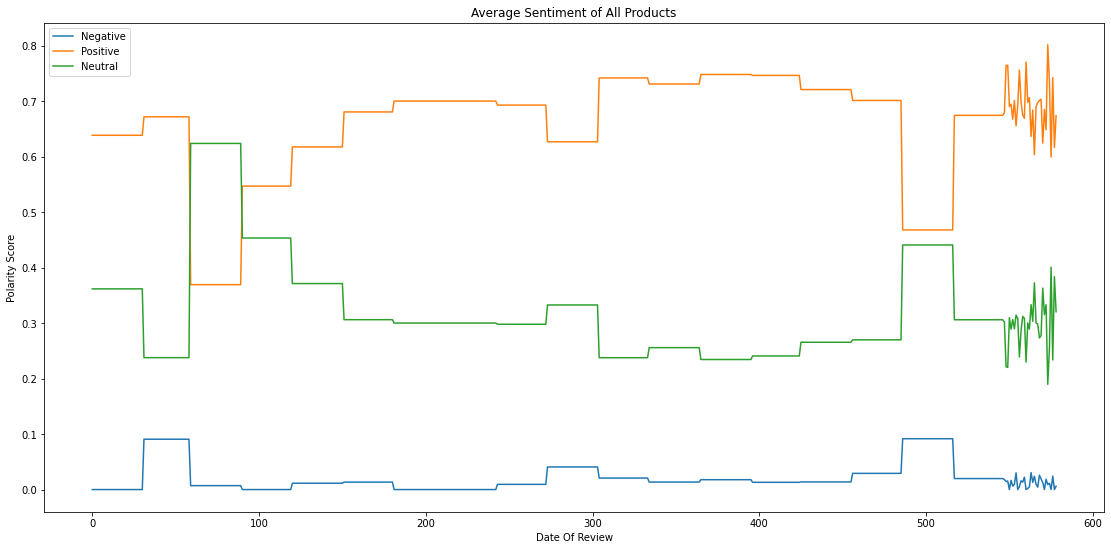

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


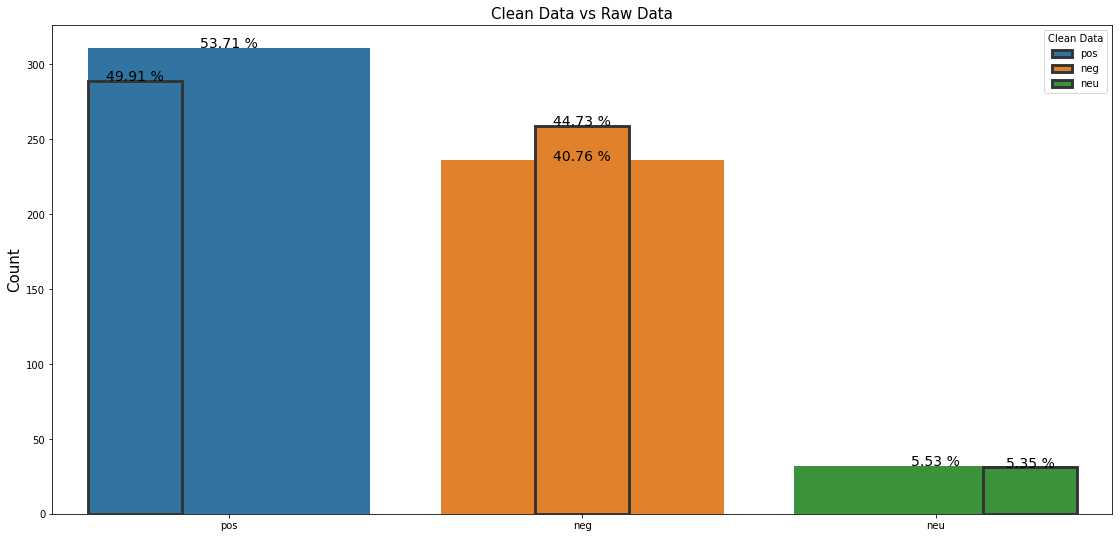

In [16]:
TextEDA(EachDayReview)

In [17]:
class StockAndTextEDA:

  def __init__(self,stockDf):
    self.stockDf = stockDf

    StockAndTextEDA.BSEVsSentiment(self)
  
  def BSEVsSentiment(self):

    #----------------------------------- BSE vs Sentiment --------------------------------------------
    vals = pd.melt(self.stockDf, id_vars=['DateOfReview'], value_vars=['ClosePrice','UserReviewSentimentCompound','FinalTextSentimentCompound'])

    fig = px.line(vals, x='DateOfReview' , y='value', color='variable',title='Stock vs Sentiment')

    fig.show()

    StockAndTextEDA.BSESpreadOpenCloseVsSentimentOfCleanData(self)

  
  def BSESpreadOpenCloseVsSentimentOfCleanData(self):
    #----------------------------------------  BSE Spread Open Close vs Sentiment of Clean Data ---------------------------------------------
    xm = minMax.fit_transform(self.stockDf['SpreadOpenClose'].values.reshape(-1,1))

    plt.figure(figsize=(19,9))

    sns.lineplot(x='DateOfReview',y=xm.flatten(),data=self.stockDf)
    sns.lineplot(x='DateOfReview',y='FinalTextSentimentCompound',data=self.stockDf)
    plt.title('Stock Spread Open Close vs Sentiment of Clean Data',fontsize=18)
    plt.show()
    StockAndTextEDA.TernaryPlotting(self)
  
  def TernaryPlotting(self):
    #----------------------------------------  Ternary  Plotting ---------------------------------------------
    fig = px.scatter_ternary(self.stockDf , a='FinalTextSentimentPositive',b='FinalTextSentimentNegative',c='FinalTextSentimentNeutral')
    fig.show()
    StockAndTextEDA.LogTransformationVsCompoundScore(self)
  
  def LogTransformationVsCompoundScore(self):
    #----------------------------------------  LogTransformationVsCompoundScore ---------------------------------------------
    log = np.log(self.stockDf['Close'])

    plt.figure(figsize=(19,9))

    sns.lineplot(x=self.stockDf['DateOfReview'],y=log)
    sns.lineplot(x=self.stockDf['DateOfReview'],y=self.stockDf['FinalTextSentimentCompound'])

    plt.title("Log Transformation vs Compound Score")
    plt.plot()
    StockAndTextEDA.SquareRootTransformationVsCompoundScore(self)
    
  def SquareRootTransformationVsCompoundScore(self):
    #----------------------------------------  Square Root Transformation vs Compound Score ---------------------------------------------
    log = np.sqrt(self.stockDf['Close'])

    plt.figure(figsize=(19,9))

    sns.lineplot(x=self.stockDf['DateOfReview'],y=log)
    sns.lineplot(x=self.stockDf['DateOfReview'],y=self.stockDf['FinalTextSentimentCompound'])


    plt.title("Square Root Transformation vs Compound Score",fontsize=18)
    plt.plot()
    StockAndTextEDA.DiffTransformationVsCompoundScore(self)

  def DiffTransformationVsCompoundScore(self):
    #----------------------------------------  Diff Transformation vs Compound Score ---------------------------------------------
    log = self.stockDf['Close'].diff(1)
    plt.figure(figsize=(19,9))

    sns.lineplot(x=self.stockDf['DateOfReview'],y=log)
    sns.lineplot(x=self.stockDf['DateOfReview'],y=self.stockDf['FinalTextSentimentCompound'])

    plt.title("Diff Transformation vs Compound Score",fontsize=18)

    plt.plot()
    StockAndTextEDA.RollingMeanTransformationVsCompoundScore(self)


  def RollingMeanTransformationVsCompoundScore(self):
    #----------------------------------------  Rolling Mean Transformation vs Compound Score ---------------------------------------------
    log = self.stockDf['Close'].rolling(30).mean()
    st = self.stockDf['Close'].rolling(30).std()

    plt.figure(figsize=(19,9))

    sns.lineplot(x=self.stockDf['DateOfReview'],y=log,label='Mean')
    sns.lineplot(x=self.stockDf['DateOfReview'],y=st,label='Standard Deviation')
    sns.lineplot(x=self.stockDf['DateOfReview'],y=self.stockDf['FinalTextSentimentCompound'],label='Polarity')


    plt.title("Rolling Mean Transformation vs Compound Score",fontsize=18)

    plt.plot()


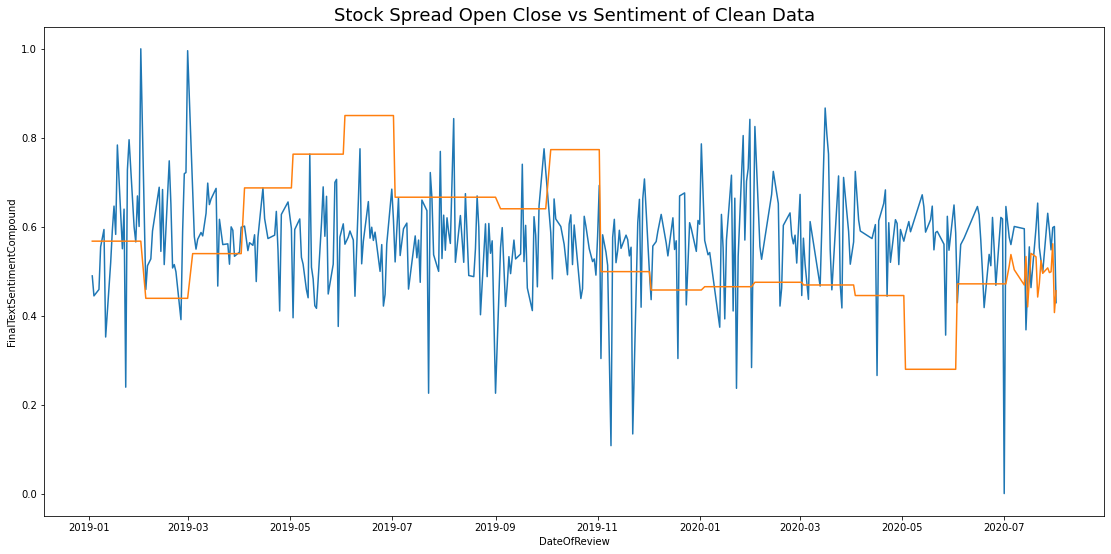

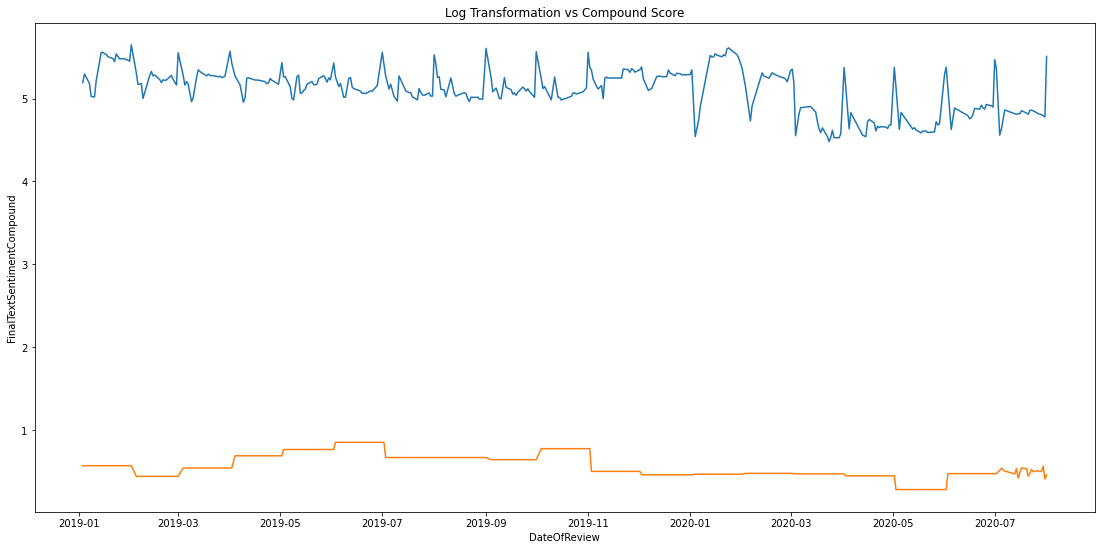

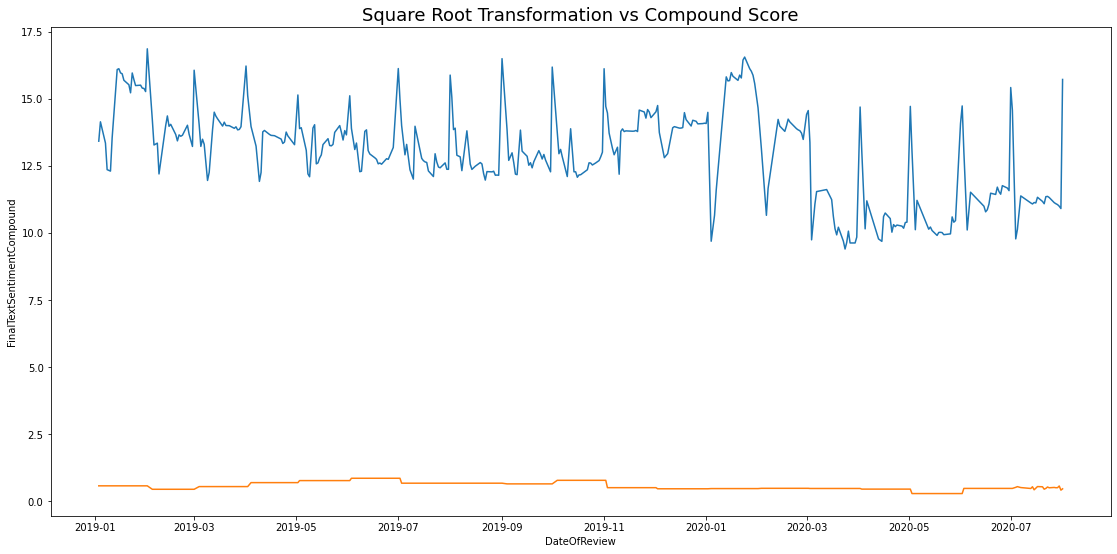

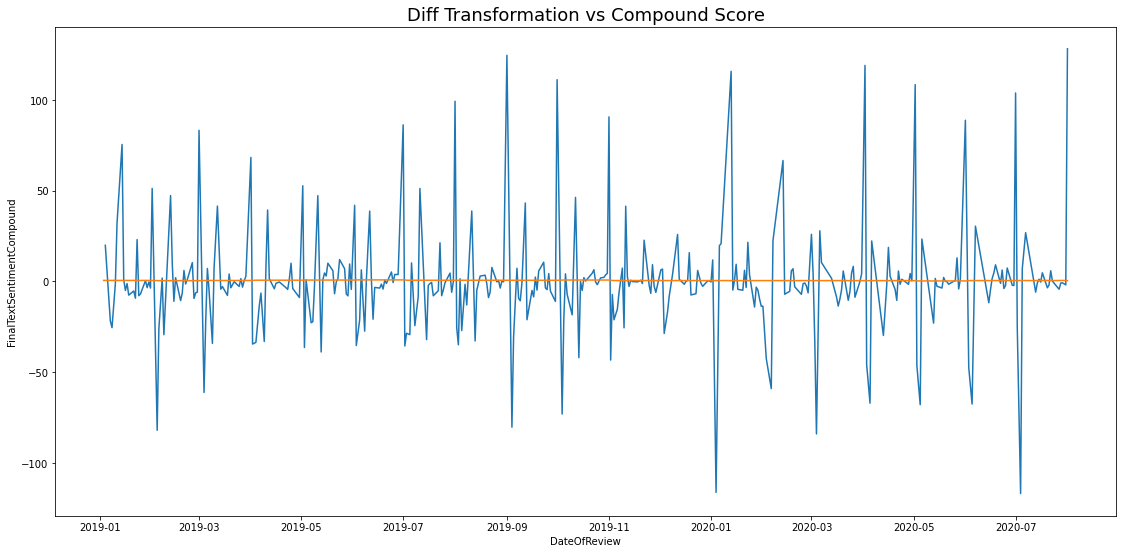

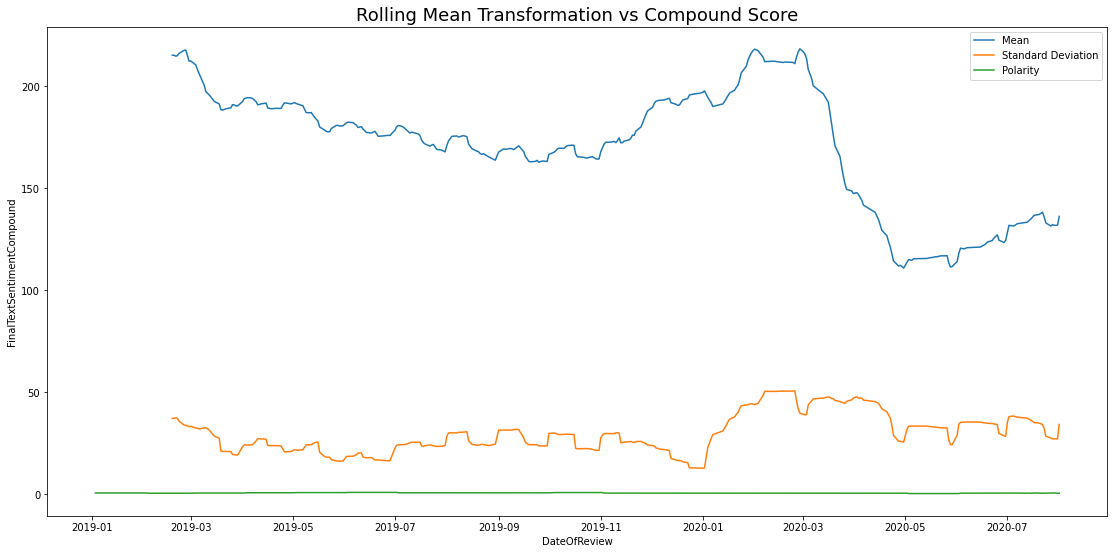

In [18]:
StockAndTextEDA(bseDataAndAllReview)